<a href="https://colab.research.google.com/github/mattematica/passion-stats-python/blob/main/unit4_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header Block

In [2]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

# Data Management Block

In [3]:
#Import Variables
addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'
myData = pd.read_csv(addhealth_url,usecols=['H4WAIST','H4GH6'],low_memory=False)

# Rename Variables

myData.rename(columns={
    'H4GH6':'CURRENT_WEIGHT',
    'H4WAIST':'WAIST_CM',
    },inplace=True)

# Manage non-responses and legit skips.  

myData['CURRENT_WEIGHT'].replace({
    996:np.nan,
    998:np.nan,
},inplace=True)

myData['WAIST_CM'].replace({
    996:np.nan,
    997:np.nan,
    999:np.nan
},inplace=True)

# Collapse Variables/Create Secondary Variables/Deal with Time

# Text Labels

# For QUANT->QUANT relationships it is important to drop these blank values.  

myData.dropna(inplace=True)

# Everything Else

<AxesSubplot:xlabel='CURRENT_WEIGHT', ylabel='WAIST_CM'>

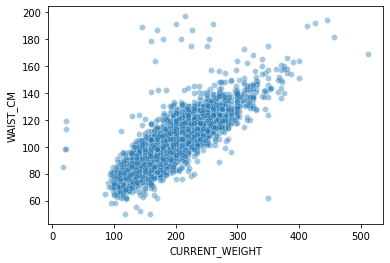

In [4]:
sb.scatterplot(data=myData, y='WAIST_CM',x='CURRENT_WEIGHT',alpha=.4,ci=False)

In [5]:
r, pvalue = pearsonr(myData['CURRENT_WEIGHT'],myData['WAIST_CM'])

print(f"r=: {r}, p-value = {pvalue} and r-squared = {r*r}")

r=: 0.829161395811504, p-value = 0.0 and r-squared = 0.6875086203040817


<AxesSubplot:xlabel='CURRENT_WEIGHT', ylabel='WAIST_CM'>

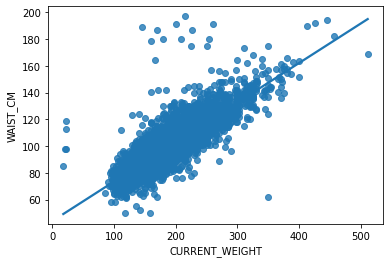

In [6]:
sb.regplot(data=myData, y='WAIST_CM',x='CURRENT_WEIGHT',ci=False)

In [7]:
m,b = np.polyfit(myData['CURRENT_WEIGHT'],myData['WAIST_CM'],1)
print(f"The slope is {m} and the initial value is {b}")

The slope is 0.2955902548429106 and the initial value is 43.906603451658796


In [8]:
m*180+b

97.1128493233827